# Machine learning for clustering: Spectral clustering

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from sklearn import mixture

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
tab=pd.read_csv('/content/drive/MyDrive/irm_thorax.txt',sep=';',header=None);
tab=np.array(tab);
n=len(tab); X=tab.reshape(n*n);

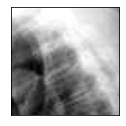

In [ ]:
figure = plt.figure(figsize=(4,2));
plt.imshow(tab, cmap='gray');
plt.xticks([], []); plt.yticks([], []);
plt.show();

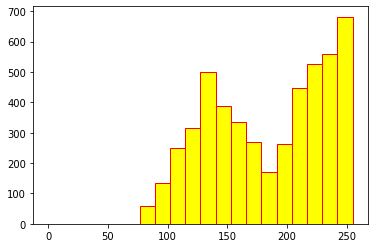

In [ ]:
n=len(tab); X=tab.reshape(n*n);
plt.hist(X, range = (0, 255), bins = 20, color = 'yellow', edgecolor = 'red');

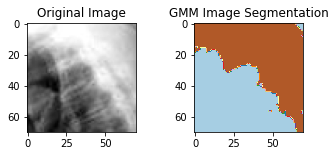

In [ ]:
from sklearn import mixture
X2 = X.reshape(-1, 1)
modgmm = mixture.GaussianMixture(n_components=2, covariance_type='full');
fitgmm=modgmm.fit(X2);
predX=fitgmm.fit_predict(X2);
imgGMMK2=predX.reshape(n,n);
#Display
figure = plt.figure(figsize=(5.5,2));
plt.xticks([], []); plt.yticks([], []);
ax = plt.subplot(1,2, 1); ax.imshow(tab, cmap='gray');
ax.set_title('Original Image')
ax = plt.subplot(1,2, 2); ax.imshow(imgGMMK2, cmap='Paired')
ax.set_title('GMM Image Segmentation')
plt.show();

# Spectral clustering

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
import pandas as pd
from scipy.spatial import distance_matrix
import math

## The data

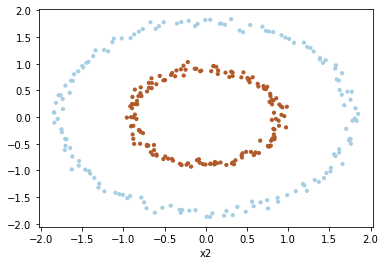

In [ ]:
nsub = 150;
my2circles = datasets.make_circles(n_samples=2*nsub, factor=.5, noise=.025)
X,y=my2circles;
#print(X)
X = StandardScaler().fit_transform(X)
#print(X)
plt.scatter(X[:, 0], X[:, 1], s=10,c=y, cmap='Paired')
plt.xlabel("x1"); plt.xlabel("x2");

## Imbricated circles

Add nsub sample points drawn fromm a 2D Gaussian law with zero means, variance equaled to 0.001 and no correlation inthe middle of the two circles

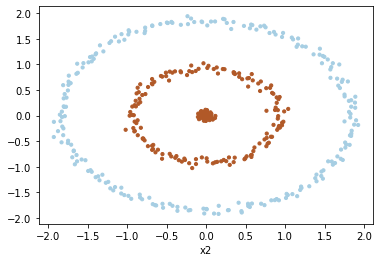

In [ ]:
nsub = 150;
my2circles = datasets.make_circles(n_samples=2*150, factor=.5, noise=.025)
my2circles2 = datasets.make_circles(n_samples=150, factor=0.001, noise=.025)
X1,y1=my2circles;
X2,y2=my2circles2;
y = np.hstack((y1,y2))
X = np.concatenate([X1,X2])
X = StandardScaler().fit_transform(X)
plt.scatter(X[:, 0], X[:, 1], s=10,c=y, cmap='Paired')
plt.xlabel("x1"); plt.xlabel("x2");

## Spectral clustering algorithm with my own Python instructions with help of ML slides lesson

## Step 1: Compute a matrix Z containing the computed values of the euclidian distances between all n observations

In [ ]:
df = pd.DataFrame(X);
Z=distance_matrix(df.values, df.values);
print(X.shape)
print(Z.shape)

(450, 2)
(450, 450)


## Step 2: Compute the affinity matrix W, between all the n observations

### $\sigma$ = 0.1

In [ ]:
sigma = 0.1

def affiniteMatrix(Z, sigma):
    n = Z.shape[0]
    p = Z.shape[1]
    W = np.zeros((n,p))
    for i in range(n):
        W[i,:] = np.exp((-Z[i,:]**2)/(2*sigma**2))
    
    return W
W = affiniteMatrix(Z, sigma)

## Step 3: Compute the L matrix for the Laplacian graph with the appropriate normalization

In [ ]:
from scipy.linalg import fractional_matrix_power

In [ ]:
def MatriceD(W):
    n = W.shape[0]
    p = W.shape[1]
    D = np.zeros((n,p))
    for i in range(n):
        D[i][i] = np.sum(W[i,:])
    
    return D    
    
def Lmatrix(W):
    n = W.shape[0]
    p = W.shape[1]
    L = np.zeros((n,p))
    In = np.eye(n)
    D = MatriceD(W)
    inv = fractional_matrix_power(D, -0.5)
    L = In - inv.dot(W).dot(inv)
    return L

L = Lmatrix(W)
    

## Step 4: Implement a Singular Value Decomposition (SVD) of the L matrix

### SVD

In [ ]:
U, E, V = np.linalg.svd(L, full_matrices=True)

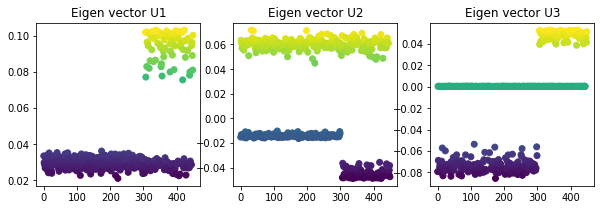

Text(0.5, 1.0, 'Eigen vector U3')

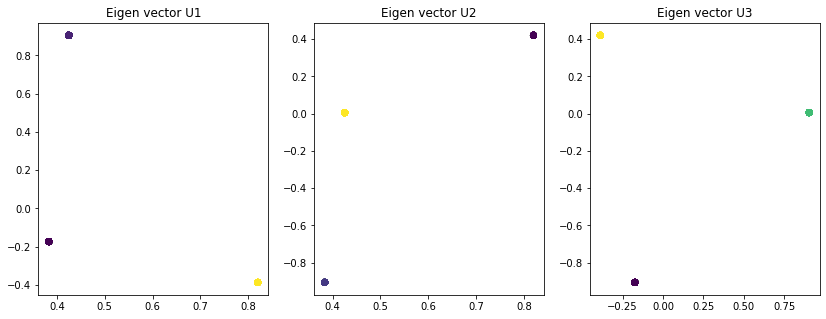

In [ ]:
K = 3
def getKvectors(E, U, K):
    ind = np.argsort(E)
    E_sorted = E[ind]
    U_sorted = U[:,ind]
    res = U_sorted[:,0:K]
    return res

def createNewU(U):
    n = U.shape[0]
    p = U.shape[1]
    newU = np.zeros((n,p))
    for i in range(n):
        newU[i,:] = U[i,:]/np.sqrt(np.sum(U[i,:]**2))
    return newU


U_sorted = getKvectors(E, U, K)
newU = createNewU(U_sorted)
x = np.arange(0,newU.shape[0])
m = ['s', 'x', 'o']

figure = plt.figure(figsize=(10,3));
ax = plt.subplot(1,3, 1); 
ax.scatter(x, U_sorted[:, 0], marker = m[2], c = U_sorted[:, 0])
ax.set_title('Eigen vector U1')
ax = plt.subplot(1,3, 2); 
ax.scatter(x, U_sorted[:, 1], marker = m[2], c = U_sorted[:, 1])
ax.set_title('Eigen vector U2')
ax = plt.subplot(1,3, 3); 
ax.scatter(x, U_sorted[:, 2], marker = m[2], c = U_sorted[:, 2])
ax.set_title('Eigen vector U3')
plt.show();


figure = plt.figure(figsize=(14,5));
ax = plt.subplot(1,3, 1); 
ax.scatter(newU[:, 0], newU[:, 1], marker = m[2], c = newU[:, 0])
ax.set_title('Eigen vector U1')
ax = plt.subplot(1,3, 2); 
ax.scatter(newU[:, 0], newU[:, 2], marker = m[2], c = newU[:, 1])
ax.set_title('Eigen vector U2')
ax = plt.subplot(1,3, 3); 
ax.scatter(newU[:, 1], newU[:, 2], marker = m[2], c = newU[:, 2])
ax.set_title('Eigen vector U3')

###  When I apply kmeans on data made with spectral clustering

(450, 3)
(450, 2)


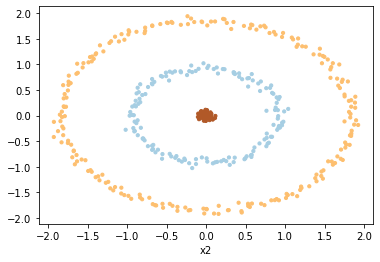

In [ ]:
from sklearn.cluster import KMeans


modkmeans = KMeans(n_clusters=K, random_state=0)
fitkmeans=modkmeans.fit(newU)
print(newU.shape)
print(X.shape)
predX=fitkmeans.fit_predict(newU);

plt.scatter(X[:, 0], X[:, 1], s=10,c=predX, cmap='Paired')
plt.xlabel("x1"); plt.xlabel("x2");


###  When I apply the kmeans without having previously done the spectral clustering

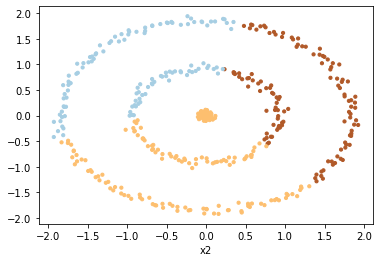

In [ ]:
from sklearn.cluster import KMeans
modkmeans = KMeans(n_clusters=K, random_state=0)
fitkmeans=modkmeans.fit(X)
predX=fitkmeans.fit_predict(X);
plt.scatter(X[:, 0], X[:, 1], s=10,c=predX, cmap='Paired')
plt.xlabel("x1"); plt.xlabel("x2");

## Impact of the Spectral Clustering hyperparameter $\sigma$

### Test avec $\sigma$ = 0.5

Text(0.5, 1.0, 'Eigen vector U3')

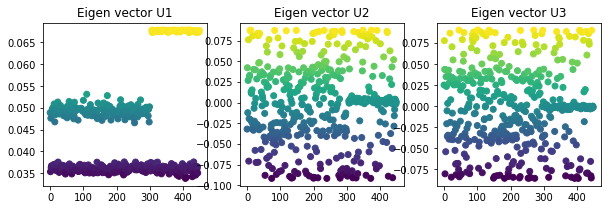

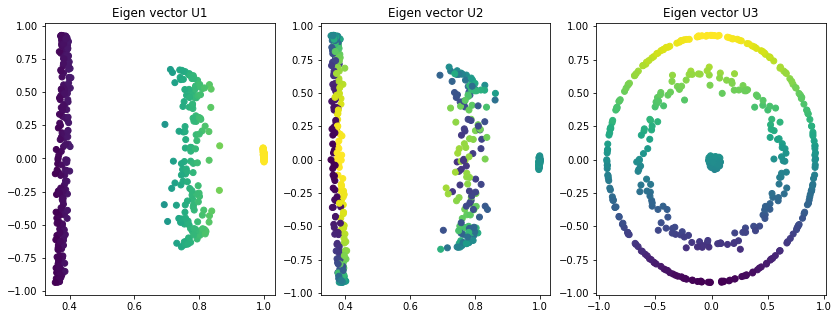

In [ ]:
sigma = 0.5

W = affiniteMatrix(Z, sigma)

L = Lmatrix(W)

U, E, V = np.linalg.svd(L, full_matrices=True)

K = 3

U_sorted = getKvectors(E, U, K)
newU = createNewU(U_sorted)

x = np.arange(0,newU.shape[0])
m = ['s', 'x', 'o']

figure = plt.figure(figsize=(10,3));
ax = plt.subplot(1,3, 1); 
ax.scatter(x, U_sorted[:, 0], marker = m[2], c = U_sorted[:, 0])
ax.set_title('Eigen vector U1')
ax = plt.subplot(1,3, 2); 
ax.scatter(x, U_sorted[:, 1], marker = m[2], c = U_sorted[:, 1])
ax.set_title('Eigen vector U2')
ax = plt.subplot(1,3, 3); 
ax.scatter(x, U_sorted[:, 2], marker = m[2], c = U_sorted[:, 2])
ax.set_title('Eigen vector U3')


figure = plt.figure(figsize=(14,5));
ax = plt.subplot(1,3, 1); 
ax.scatter(newU[:, 0], newU[:, 1], marker = m[2], c = newU[:, 0])
ax.set_title('Eigen vector U1')
ax = plt.subplot(1,3, 2); 
ax.scatter(newU[:, 0], newU[:, 2], marker = m[2], c = newU[:, 1])
ax.set_title('Eigen vector U2')
ax = plt.subplot(1,3, 3); 
ax.scatter(newU[:, 1], newU[:, 2], marker = m[2], c = newU[:, 2])
ax.set_title('Eigen vector U3')

(450, 3)
(450, 2)


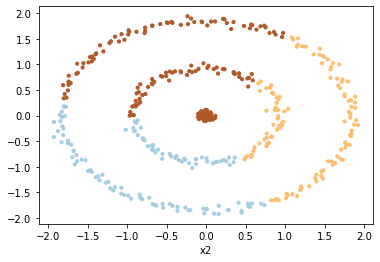

In [ ]:
from sklearn.cluster import KMeans


modkmeans = KMeans(n_clusters=K, random_state=0)
fitkmeans=modkmeans.fit(newU)
print(newU.shape)
print(X.shape)
predX=fitkmeans.fit_predict(newU);

plt.scatter(X[:, 0], X[:, 1], s=10,c=predX, cmap='Paired')
plt.xlabel("x1"); plt.xlabel("x2");


## Spectral clustering with scikit-learn easy

## HAC with scikit-learn